In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [23]:
df =data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Showing the Duplicated rows

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
df.shape

(891, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
male_ages=data.loc[df['Sex']=="male",['Age']]
mean_male_ages=round(male_ages.mean())
female_ages=data.loc[df['Sex']=="female",['Age']]
mean_female_ages=round(female_ages.mean())
print(f"Mean age of male passengers is {mean_male_ages}")
print(f"Mean age of female passengers is {mean_female_ages}")

Mean age of male passengers is Age    31.0
dtype: float64
Mean age of female passengers is Age    28.0
dtype: float64


In [31]:
for index, row in data.iterrows():
    if row['Sex'] == 'male' and pd.isnull(row['Age']):
        df.at[index, 'Age'] = mean_male_ages
    elif row['Sex'] == 'female' and pd.isnull(row['Age']):
        df.at[index, 'Age'] = mean_female_ages

<ipython-input-31-b9e2fe141402>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[index, 'Age'] = mean_male_ages
<ipython-input-31-b9e2fe141402>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[index, 'Age'] = mean_female_ages


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we will remove the cabin column because it has many null values

In [39]:
sex_counts=df['Sex'].value_counts()

([<matplotlib.patches.Wedge at 0x7fe431ee92d0>,
 [Text(-0.4919454315896098, 0.9838646717603559, 'male'),
  Text(0.49194551760179267, -0.9838646287531149, 'female')],
 [Text(-0.26833387177615076, 0.5366534573238304, '64.8%'),
  Text(0.2683339186918869, -0.5366534338653353, '35.2%')])

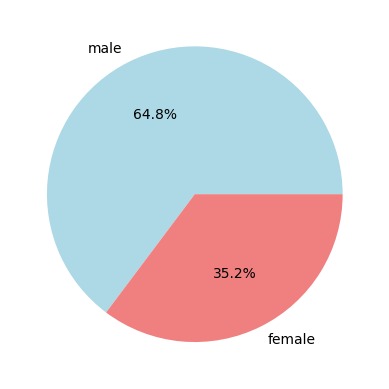

In [40]:
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%',colors=['lightblue', 'lightcoral'])

([<matplotlib.patches.Wedge at 0x7fe431eb2490>,
 [Text(-0.39257494735793463, 1.0275626067091557, 'Not Survived'),
  Text(0.3925749146953058, -1.0275626191877425, 'Survived')],
 [Text(-0.21413178946796432, 0.5604886945686304, '61.6%'),
  Text(0.21413177165198496, -0.5604887013751322, '38.4%')])

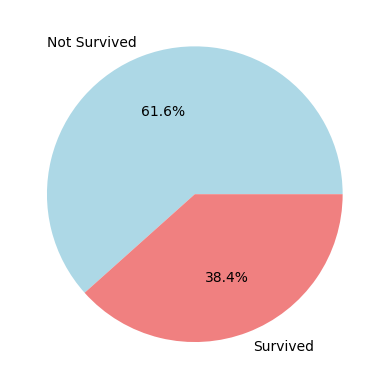

In [41]:
survived_counts=df['Survived'].astype(str).value_counts()
plt.pie(survived_counts,labels=["Not Survived", "Survived"], autopct='%1.1f%%',colors=['lightblue', 'lightcoral'])

<ipython-input-42-2f1c63eaf816>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Pclass"], y=df["Survived"]*100,hue=data['Sex'],ci=None,palette="Set2")


<Axes: xlabel='Pclass', ylabel='Survived'>

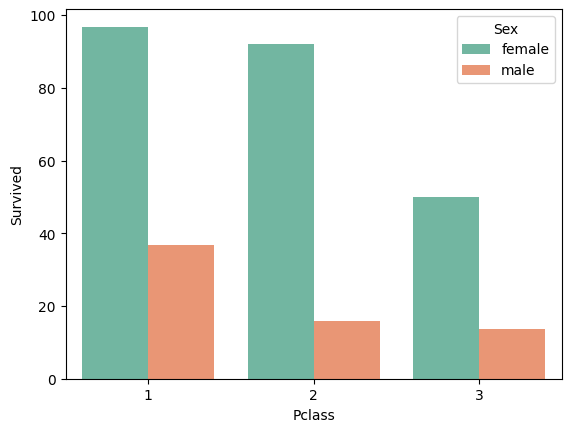

In [42]:
sns.barplot(x=df["Pclass"], y=df["Survived"]*100,hue=data['Sex'],ci=None,palette="Set2")

<Axes: xlabel='Pclass', ylabel='Count'>

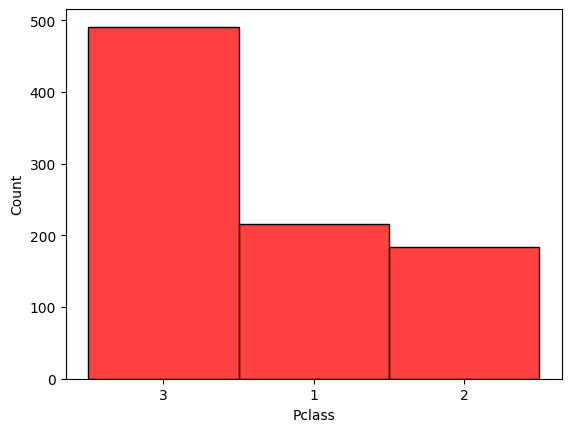

In [44]:
sns.histplot(data=df['Pclass'].astype(str),color='red')

<ipython-input-45-9d4de32518d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sex'],y=df['Age'],data=data,palette='Set2')


<Axes: xlabel='Sex', ylabel='Age'>

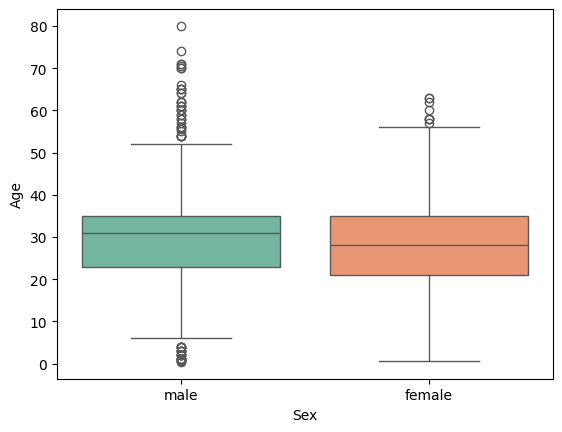

In [45]:
sns.boxplot(x=df['Sex'],y=df['Age'],data=data,palette='Set2')

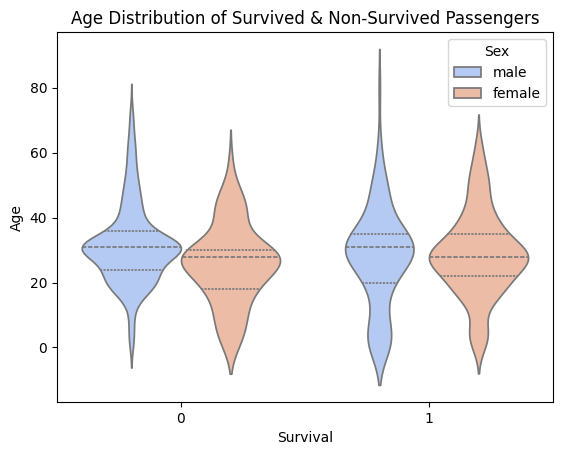

In [46]:
sns.violinplot(x="Survived", y="Age", hue="Sex",data=df, palette="coolwarm", inner="quartile")
plt.title("Age Distribution of Survived & Non-Survived Passengers")
plt.xlabel('Survival')
plt.show()

In [48]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
le = LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
print(df['Embarked'].unique())
print(df['Embarked'].mode())

[2 0 1 3]
0    2
Name: Embarked, dtype: int64


In [53]:
df['Embarked']=data['Embarked'].fillna(df['Embarked'].mode())

In [56]:
for index, row in df.iterrows():
    if row['Sex'] == 'male':
        df.at[index, 'Sex'] =0
    elif row['Sex'] == 'female':
        df.at[index, 'Sex'] = 1

In [57]:
d={'Age':df['Age'],'Pclass':df['Pclass'],'Gender':df['Sex'],'Survived':df['Survived'],'SibSp':df['SibSp'],'Parch':df['Parch'],'Embarked':df['Embarked']}
df_subset=pd.DataFrame(d)

In [58]:
df_subset.corr()

,Age,Pclass,Gender,Survived,SibSp,Parch,Embarked
Age,1.000000,-0.329201,-0.104850,-0.081736,-0.237059,-0.183536,-0.020663
Pclass,-0.329201,1.000000,-0.131900,-0.338481,0.083081,0.018443,0.157112
Gender,-0.104850,-0.131900,1.000000,0.543351,0.114631,0.245489,-0.104057
Survived,-0.081736,-0.338481,0.543351,1.000000,-0.035322,0.081629,-0.163517
SibSp,-0.237059,0.083081,0.114631,-0.035322,1.000000,0.414838,0.066654
Parch,-0.183536,0.018443,0.245489,0.081629,0.414838,1.000000,0.038322
Embarked,-0.020663,0.157112,-0.104057,-0.163517,0.066654,0.038322,1.000000


<Axes: >

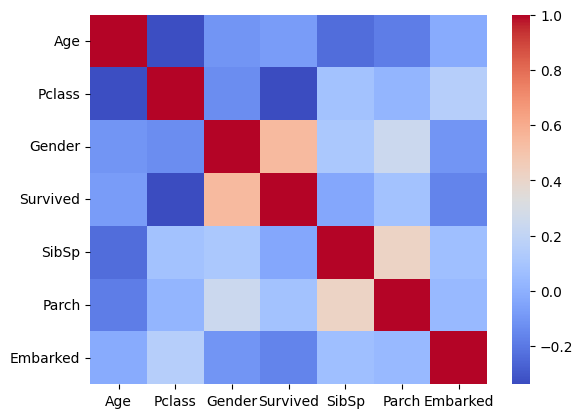

In [59]:
sns.heatmap(df_subset.corr(),cmap='coolwarm')

In [65]:
X = df[['Sex', 'Pclass', 'Embarked']]
y = df['Survived']

In [66]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [76]:
score_list=[]
k_range = range(1, 21,2)
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_valid_pred=model.predict(X_val)
    score=accuracy_score(y_val,y_valid_pred)
    score_list.append(score)
score_list

[0.7191011235955056,
 0.8033707865168539,
 0.8033707865168539,
 0.8033707865168539,
 0.8202247191011236,
 0.8202247191011236,
 0.8202247191011236,
 0.8146067415730337,
 0.8146067415730337,
 0.8202247191011236]

The Validation best accuracy using validation set is 0.8202247191011236


In [77]:
best_K=k_range[np.argmax(score_list)]
print(f"Best K is {best_K}")

Best K is 9


In [78]:
final_model = KNeighborsClassifier(n_neighbors=best_K)
final_model.fit(X_train_val, y_train_val)
y_pred = final_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749


So the Best score without using validation set is 0.7932960893854749

# Cross Validation
Using K-fold

In [74]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=kfold)
print("KFold CV Accuracies:", cv_scores)
print(f"Mean KFold Accuracy: {np.mean(cv_scores):.4f}")

KFold CV Accuracies: [0.75925926 0.83333333 0.83333333 0.64814815 0.9245283  0.71698113
 0.79245283 0.81132075 0.86792453 0.73584906]
Mean KFold Accuracy: 0.7923


In [91]:
print("Cross Validation avg Accuracy:",np.mean(cv_scores))
y_val_pred = final_model.fit(X_train_val, y_train_val).predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_acc)

y_test_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_acc)

Cross Validation avg Accuracy: 0.792313067784766
Validation Accuracy: 0.7865168539325843
Test Accuracy: 0.7932960893854749


# Confusion Matrix:

In [88]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # use 'weighted' if class imbalance
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Accuracy:  0.793
Precision: 0.787
Recall:    0.786
F1-score:  0.786


In [83]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[87 18]
 [19 55]]


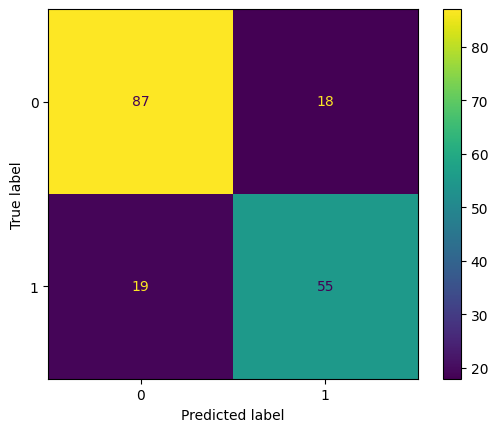

In [84]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

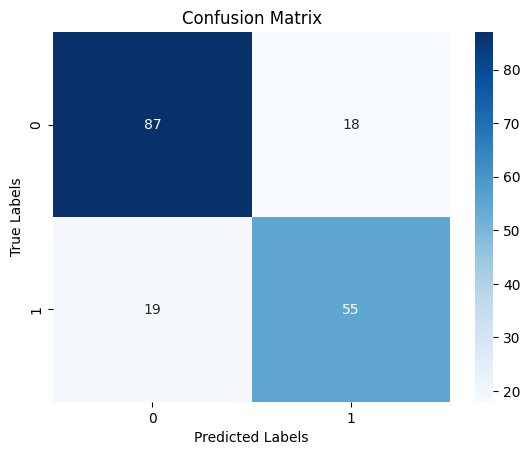

In [85]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Overfitting and Model Improvement
Tuning K-value : we'll choose higher


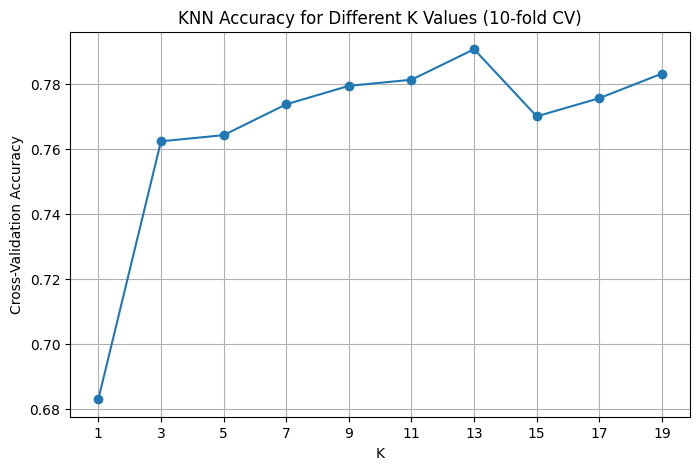

Best K: 13 with CV accuracy: 0.791


In [99]:
k_values = range(1, 21,2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.title('KNN Accuracy for Different K Values (10-fold CV)')
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best K: {best_k} with CV accuracy: {max(cv_scores):.3f}")


In [100]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_test_pred = final_knn.predict(X_test)
print("Final test accuracy:", accuracy_score(y_test, y_test_pred))

Final test accuracy: 0.776536312849162
